# Checking the quality of `GPT`'s annotation

In this notebook, we will check if there are wrong formatting or any issue in the outputs

## Libraries

In [1]:
import pandas as pd
import re 
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Global variables 

In [2]:
ROOT = Path("../../data")
subset_name = f"subset_{0}"
model_name = "gpt-4o-mini"
CHECKPOINT_CSV = ROOT / "subsets_Di_annotated" / f"{subset_name}_{model_name}.csv"

In [3]:
df = pd.read_csv(CHECKPOINT_CSV, encoding="utf-8")
print(f'Length before dropping NaN: {len(df)}')
df = df.dropna()
print(f'Length after dropping NaN: {len(df)}')
df

Length before dropping NaN: 29195
Length after dropping NaN: 29194


,msg_id,user,content,topic,deleted,banned,hour,explication,ton,intention,categorie,labels,toxicite_score,certitude,conclusion
0,anon_msg_9198a73c84ed,anon_user_079568ca56,osef le drapeau fr en allemagne a besoin de so...,anon_topic_de7347d6,1,1,5,Le message indique que le drapeau français en ...,"Tons identifiés : Apathique (80%), Critique (6...",1. Exprimer une opinion (degré de certitude : ...,"Catégories : [""Évocation ambiguë d’un propos t...",Labels : S0/H0/V0/R0/A2/I2 \nJustification : ...,Note : 2/10 \nJustification : Expression d'ap...,Certitude : élevée,Conclusion : 0
1,anon_msg_0ed0dcd30a95,anon_user_e8a049aa62,Ça rage sur les chad novax au sang 10/10,anon_topic_e697e741,1,0,10,Le message évoque une frustration ou une colèr...,"Tons identifiés : Indigné (80%), Moqueur (70%)...","Intentions identifiées : Critiquer (80%), Se m...","Catégories : [""Évocation d’un propos toxique a...",Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie appuyé...,Certitude : élevée,Conclusion : 1
2,anon_msg_b1641d66622a,anon_user_4fe7b2f2fe,"Pas moi, je ne connais pas de mégane",anon_topic_a64f2ab6,1,0,5,Le message exprime que l'auteur ne connaît pas...,"Tons identifiés : Neutre (certitude élevée), D...","Intentions identifiées : Informer, Exprimer un...",Catégories : []\nJustification : Le message es...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,"Note : 0/10 \nJustification : Message neutre,...",Certitude : élevée,Conclusion : 0
3,anon_msg_8c19931d9a0b,anon_user_ab4654f2c9,l'été arrive et l'odeur des pieds puants des k...,anon_topic_e6ef1ef7,1,0,5,Le message évoque l'arrivée de l'été et décrit...,"Tons identifiés : Ironique (80%), Humoristique...",Les intentions identifiées sont : Exprimer une...,"Catégories : [""Humour à double lecture"", ""Évoc...",Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie et mép...,Certitude : moyenne,Conclusion : 1
4,anon_msg_80440252f1ca,anon_user_a034768ac3,Si tu es épanoui et que tu vis bien c'est très...,anon_topic_d956e559,1,1,5,Le message indique que si quelqu'un se sent ép...,Tons identifiés : Bienveillant (certitude élev...,"Intentions identifiées : Valoriser, Informer, ...",Catégories : []\nJustification : Le message es...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Message bienvei...,Certitude : élevée,Conclusion : 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29190,anon_msg_c80cba6a61c3,anon_user_9834b4ffc2,Est-ce que cette chienne a un nom?,anon_topic_41ba80aa,1,0,8,- Sujet du message : La demande d'information ...,"Tons perçus : Neutre, Potentiellement Moqueur....",1. **Demander des informations** (95% de certi...,"Catégories : [""Micro-agression"", ""Ambiguïté fo...",Labels : S1/H0/V0/R0/A1/I2 \nJustification : ...,Note : 2/10 \nJustification : Le message est ...,Certitude : élevée,Conclusion : 0
29191,anon_msg_80b18e751a19,anon_user_2bdf72f392,Ha j'ai des éléments de réponse.\nJe suis viol...,anon_topic_92886b13,1,1,12,**Sujet du message** : Violence personnelle.\n...,"Tons perçus : Neutre, Inquiet, Réflexif.\n\nJu...",1. **Reconnaître** :\n - L'auteur admet être...,"Catégories : [""Évocation d’un propos toxique s...",Labels : S0/H0/V2/R0/A1/I2 \nJustification : ...,Note : 4/10 \nJustification : La mention de v...,Certitude : moyenne,Conclusion : 0
29192,anon_msg_265e5fbf633d,anon_user_2aac58c49b,J'suis toujours sur le cul de voir Balatro dan...,anon_topic_22c6104b,0,1,5,- Sujet du message : Réaction à l'inclusion de...,"Tons perçus : Surpris, Étonné. \n\nJustificati...",1. **Surprendre** : L'auteur exprime une surpr...,"Catégories : [""Évocation ambiguë d’un propos t...",Labels : S0/H0/V0/R0/A1/I2 \nJustification : ...,Note : 2/10 \nJustification : Bien que le mes...,Certitude : élevée,Conclusion : 0
29193,anon_msg_9ce785ee396a,anon_user_d8ee4edaa0,"L'intérêt est de détruire, non pas de nuire",anon_topic_56b2b029,1,1,10,**Sujet du message** : Motivation derrièr

## Utility functions

In [4]:
def check_empty_or_nan(df, col):
    return df[col].isna().sum(), (df[col].str.strip() == '').sum()

def extract_label_codes(text):
    """Extract codes like S0/H2/V0/..."""
    return re.findall(r'[SHVRAI]\d', text)

def extract_score(text):
    match = re.search(r'Note\s*:\s*(\d+)/10', text)
    return int(match.group(1)) if match else None

## Field-by-field quality checks

### Explanation (`explication`)

In [5]:
print("=== Check: explication ===")
empty_count, blank_count = check_empty_or_nan(df, "explication")
print(f"Empty: {empty_count}, Blank: {blank_count}")

=== Check: explication ===
Empty: 0, Blank: 0


### Tone (`ton`)

In [6]:
print("\n=== Check: ton ===")
empty_count, blank_count = check_empty_or_nan(df, "ton")
print(f"Empty: {empty_count}, Blank: {blank_count}")


=== Check: ton ===
Empty: 0, Blank: 0


### Intention (`intention`)

In [7]:
print("\n=== Check: explication ===")
empty_count, blank_count = check_empty_or_nan(df, "explication")
print(f"Empty: {empty_count}, Blank: {blank_count}")


=== Check: explication ===
Empty: 0, Blank: 0


### Categorie (`categorie`)

In [8]:
allowed_categories = [
    "critique explicite d’une idée toxique",
    "évocation d’un propos toxique sans adhésion",
    "évocation ambiguë d’un propos toxique",
    "évocation d’un propos toxique avec adhésion",
    "humour à double lecture",
    "bienveillance trompeuse",
    "micro-agression",
    "dog-whistle",
    "manipulation pseudo-rationnelle",
    "ambiguïté forte indécidable",
    "inversion toxique",
    "reformulation toxique indirecte (strawman)",
    "banalisation d’une idée toxique",
    "répétition indirecte ou moquerie passive",
    "toxicité visuelle"
]

In [9]:
print(f'Length before filtering categories: {len(df)}')
# Remove rows that don't contain 'Catégories :' 
df_categories = df[df['categorie'].str.contains("Catégories :")].copy()
print(f'Length after filtering rows that contain "Catégories :": {len(df_categories)}')
# Remove rows that don't contain 'Justification :'
df_categories = df_categories[df_categories['categorie'].str.contains("Justification :")].copy()
print(f'Length after filtering rows that contain "Justification :": {len(df_categories)}')
# Extract categories list
df_categories['categorie_list'] = df_categories['categorie'].apply(
	lambda x: re.findall(r'Catégories :(.*)Justification :', x, re.DOTALL)
)
df_categories['categorie_list'] = df_categories['categorie_list'].apply(
	lambda x: re.findall(r'"([^"]+)"', x[0].strip()) if x else []
)
# Remove categories that are not in the allowed list
df_categories['categorie_list'] = df_categories['categorie_list'].apply(
	lambda x: [cat for cat in x if cat.lower() in allowed_categories]
)
df_categories['categorie_justification'] = df_categories['categorie'].apply(lambda x: re.findall(r'Justification :(.*)', x, re.DOTALL)[0].strip())
df_categories

Length before filtering categories: 29194
Length after filtering rows that contain "Catégories :": 27682
Length after filtering rows that contain "Justification :": 27682


,msg_id,user,content,topic,deleted,banned,hour,explication,ton,intention,categorie,labels,toxicite_score,certitude,conclusion,categorie_list,categorie_justification
0,anon_msg_9198a73c84ed,anon_user_079568ca56,osef le drapeau fr en allemagne a besoin de so...,anon_topic_de7347d6,1,1,5,Le message indique que le drapeau français en ...,"Tons identifiés : Apathique (80%), Critique (6...",1. Exprimer une opinion (degré de certitude : ...,"Catégories : [""Évocation ambiguë d’un propos t...",Labels : S0/H0/V0/R0/A2/I2 \nJustification : ...,Note : 2/10 \nJustification : Expression d'ap...,Certitude : élevée,Conclusion : 0,[Évocation ambiguë d’un propos toxique],Le message critique une situation sans être cl...
1,anon_msg_0ed0dcd30a95,anon_user_e8a049aa62,Ça rage sur les chad novax au sang 10/10,anon_topic_e697e741,1,0,10,Le message évoque une frustration ou une colèr...,"Tons identifiés : Indigné (80%), Moqueur (70%)...","Intentions identifiées : Critiquer (80%), Se m...","Catégories : [""Évocation d’un propos toxique a...",Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie appuyé...,Certitude : élevée,Conclusion : 1,"[Évocation d’un propos toxique avec adhésion, ...","Le message se moque des ""chad novax"" en exprim..."
2,anon_msg_b1641d66622a,anon_user_4fe7b2f2fe,"Pas moi, je ne connais pas de mégane",anon_topic_a64f2ab6,1,0,5,Le message exprime que l'auteur ne connaît pas...,"Tons identifiés : Neutre (certitude élevée), D...","Intentions identifiées : Informer, Exprimer un...",Catégories : []\nJustification : Le message es...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,"Note : 0/10 \nJustification : Message neutre,...",Certitude : élevée,Conclusion : 0,[],"Le message est neutre et factuel, sans indicat..."
3,anon_msg_8c19931d9a0b,anon_user_ab4654f2c9,l'été arrive et l'odeur des pieds puants des k...,anon_topic_e6ef1ef7,1,0,5,Le message évoque l'arrivée de l'été et décrit...,"Tons identifiés : Ironique (80%), Humoristique...",Les intentions identifiées sont : Exprimer une...,"Catégories : [""Humour à double lecture"", ""Évoc...",Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie et mép...,Certitude : moyenne,Conclusion : 1,"[Humour à double lecture, Évocation ambiguë d’...",Le message utilise l'humour pour critiquer un ...
4,anon_msg_80440252f1ca,anon_user_a034768ac3,Si tu es épanoui et que tu vis bien c'est très...,anon_topic_d956e559,1,1,5,Le message indique que si quelqu'un se sent ép...,Tons identifiés : Bienveillant (certitude élev...,"Intentions identifiées : Valoriser, Informer, ...",Catégories : []\nJustification : Le message es...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Message bienvei...,Certitude : élevée,Conclusion : 0,[],Le message est clairement bienveillant et valo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29190,anon_msg_c80cba6a61c3,anon_user_9834b4ffc2,Est-ce que cette chienne a un nom?,anon_topic_41ba80aa,1,0,8,- Sujet du message : La demande d'information ...,"Tons perçus : Neutre, Potentiellement Moqueur....",1. **Demander des informations** (95% de certi...,"Catégories : [""Micro-agression"", ""Ambiguïté fo...",Labels : S1/H0/V0/R0/A1/I2 \nJustification : ...,Note : 2/10 \nJustification : Le message est ...,Certitude : élevée,Conclusion : 0,"[Micro-agression, Ambiguïté forte indécidable]",Le terme « chienne » suggère une possible cond...
29191,anon_msg_80b18e751a19,anon_user_2bdf72f392,Ha j'ai des éléments de réponse.\nJe suis viol...,anon_topic_92886b13,1,1,12,**Sujet du message** : Violence personnelle.\n...,"Tons perçus : Neutre, Inquiet, Réflexif.\n\nJu...",1. **Reconnaître** :\n - L'auteur admet être...,"Catégories : [""Évocation d’un propos toxique s...",Labels : S0/H0/V2/R0/A1/I2 \nJustification : ...,Note : 4/10 \nJustification : La mention de v...,Certitude : moyenne,Conclusion : 0,[Évocation d’un propos toxique sans adhésion],L'auteur évoque sa violence

### Labels (`labels`)

In [10]:
print(f"Length before filtering labels: {len(df)}")
# Remove rows that don't contain 'Labels :'
df_labels = df[df['labels'].str.contains("Labels :")].copy()
print(f"Length after filtering rows that contain 'Labels :': {len(df_labels)}")
# Remove rows that don't contain 'Justification :'
df_labels = df_labels[df_labels['labels'].str.contains("Justification :")].copy()
print(f"Length after filtering rows that contain 'Justification :': {len(df_labels)}")
# Extract labels list
df_labels['labels_list'] = df_labels['labels'].apply(lambda x: re.findall(r'Labels :(.*)Justification :', x, re.DOTALL)[0].strip())
df_labels['labels_list'] = df_labels['labels_list'].apply(lambda x: re.findall(r'\b[SHVRAI][0-3]\b', x))
# Remove the rows that don't contain exactly 6 labels and that don't have 'S', 'H', 'V', 'R', 'A', 'I' in the labels
df_labels = df_labels[df_labels['labels_list'].apply(lambda x: len(x) == 6 and all(label in ' '.join(x) for label in ['S', 'H', 'V', 'R', 'A', 'I']))]
df_labels['labels_justification'] = df_labels['labels'].apply(lambda x: re.findall(r'Justification :(.*)', x, re.DOTALL)[0].strip())
df_labels

Length before filtering labels: 29194
Length after filtering rows that contain 'Labels :': 23314
Length after filtering rows that contain 'Justification :': 23307


,msg_id,user,content,topic,deleted,banned,hour,explication,ton,intention,categorie,labels,toxicite_score,certitude,conclusion,labels_list,labels_justification
0,anon_msg_9198a73c84ed,anon_user_079568ca56,osef le drapeau fr en allemagne a besoin de so...,anon_topic_de7347d6,1,1,5,Le message indique que le drapeau français en ...,"Tons identifiés : Apathique (80%), Critique (6...",1. Exprimer une opinion (degré de certitude : ...,"Catégories : [""Évocation ambiguë d’un propos t...",Labels : S0/H0/V0/R0/A2/I2 \nJustification : ...,Note : 2/10 \nJustification : Expression d'ap...,Certitude : élevée,Conclusion : 0,"[S0, H0, V0, R0, A2, I2]",Le message critique le manque de soutien sans ...
1,anon_msg_0ed0dcd30a95,anon_user_e8a049aa62,Ça rage sur les chad novax au sang 10/10,anon_topic_e697e741,1,0,10,Le message évoque une frustration ou une colèr...,"Tons identifiés : Indigné (80%), Moqueur (70%)...","Intentions identifiées : Critiquer (80%), Se m...","Catégories : [""Évocation d’un propos toxique a...",Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie appuyé...,Certitude : élevée,Conclusion : 1,"[S0, H2, V0, R0, A2, I2]","Le message se moque d'un groupe spécifique, av..."
2,anon_msg_b1641d66622a,anon_user_4fe7b2f2fe,"Pas moi, je ne connais pas de mégane",anon_topic_a64f2ab6,1,0,5,Le message exprime que l'auteur ne connaît pas...,"Tons identifiés : Neutre (certitude élevée), D...","Intentions identifiées : Informer, Exprimer un...",Catégories : []\nJustification : Le message es...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,"Note : 0/10 \nJustification : Message neutre,...",Certitude : élevée,Conclusion : 0,"[S0, H0, V0, R0, A0, I0]","Le message est factuel et neutre, sans contenu..."
3,anon_msg_8c19931d9a0b,anon_user_ab4654f2c9,l'été arrive et l'odeur des pieds puants des k...,anon_topic_e6ef1ef7,1,0,5,Le message évoque l'arrivée de l'été et décrit...,"Tons identifiés : Ironique (80%), Humoristique...",Les intentions identifiées sont : Exprimer une...,"Catégories : [""Humour à double lecture"", ""Évoc...",Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie et mép...,Certitude : moyenne,Conclusion : 1,"[S0, H2, V0, R0, A2, I2]","Pas d'allusion sexuelle, mais moquerie stéréot..."
4,anon_msg_80440252f1ca,anon_user_a034768ac3,Si tu es épanoui et que tu vis bien c'est très...,anon_topic_d956e559,1,1,5,Le message indique que si quelqu'un se sent ép...,Tons identifiés : Bienveillant (certitude élev...,"Intentions identifiées : Valoriser, Informer, ...",Catégories : []\nJustification : Le message es...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Message bienvei...,Certitude : élevée,Conclusion : 0,"[S0, H0, V0, R0, A0, I0]","Message bienveillant et factuel, sans allusion..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29189,anon_msg_4c3a0fb9028d,anon_user_d0fa84cce4,"""Judéo-chrétienne""\nL'éducation nationale a bi...",anon_topic_bb61c1b0,1,1,10,**Sujet du message** : Évaluation de l'éducati...,"Tons perçus : Sarcastique, Critique, Neutre.\n...",1. **Critiquer** (Degré de certitude : Élevé) ...,"Catégories : [""Critique explicite d’une idée t...",Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 2/10 \nJustification : Ton sarcastique...,Certitude : moyenne,Conclusion : 0,"[S0, H2, V0, R0, A2, I2]",Le message critique les valeurs judéo-chrétien...
29190,anon_msg_c80cba6a61c3,anon_user_9834b4ffc2,Est-ce que cette chienne a un nom?,anon_topic_41ba80aa,1,0,8,- Sujet du message : La demande d'information ...,"Tons perçus : Neutre, Potentiellement Moqueur....",1. **Demander des informations** (95% de certi...,"Catégories : [""Micro-agression"", ""Ambiguïté fo...",Labels : S1/H0/V0/R0/A1/I2 \nJustification : ...,Note : 2/10 \nJustification : Le message est ...,Certitude : élevée,Conclusion : 0,"[S1, H0, V0, R0, A1, I2]","Le terme ""chienne"" est une référence sexuelle ..."
29191,anon_msg_80b18e751a19

### Toxicity score (`toxicite_score`)

In [11]:
df_toxicite = df[df['toxicite_score'].str.contains("Note :") & df['toxicite_score'].str.contains("Justification :")].copy()
print(f"Removing rows that don't contain 'Note :' and 'Justification :'. Rows before: {len(df)}, Rows after: {len(df_toxicite)}")
df_toxicite['note'] = df_toxicite['toxicite_score'].apply(
	lambda x: re.findall(r'Note :(.*)Justification :', x, re.DOTALL)[0].strip() if re.findall(r'Note :(.*)Justification :', x, re.DOTALL) else None
)
df_toxicite['note'] = df_toxicite['note'].apply(
	lambda x: re.findall(r'\b(?:10|[0-9])/10\b', x)[0] if x and re.findall(r'\b(?:10|[0-9])/10\b', x) else None
)
df_toxicite['note_justification'] = df_toxicite['toxicite_score'].apply(lambda x: re.findall(r'Justification :(.*)', x, re.DOTALL)[0].strip())
df_toxicite

Removing rows that don't contain 'Note :' and 'Justification :'. Rows before: 29194, Rows after: 29160


,msg_id,user,content,topic,deleted,banned,hour,explication,ton,intention,categorie,labels,toxicite_score,certitude,conclusion,note,note_justification
0,anon_msg_9198a73c84ed,anon_user_079568ca56,osef le drapeau fr en allemagne a besoin de so...,anon_topic_de7347d6,1,1,5,Le message indique que le drapeau français en ...,"Tons identifiés : Apathique (80%), Critique (6...",1. Exprimer une opinion (degré de certitude : ...,"Catégories : [""Évocation ambiguë d’un propos t...",Labels : S0/H0/V0/R0/A2/I2 \nJustification : ...,Note : 2/10 \nJustification : Expression d'ap...,Certitude : élevée,Conclusion : 0,2/10,Expression d'apathie et critique légère sans a...
1,anon_msg_0ed0dcd30a95,anon_user_e8a049aa62,Ça rage sur les chad novax au sang 10/10,anon_topic_e697e741,1,0,10,Le message évoque une frustration ou une colèr...,"Tons identifiés : Indigné (80%), Moqueur (70%)...","Intentions identifiées : Critiquer (80%), Se m...","Catégories : [""Évocation d’un propos toxique a...",Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie appuyé...,Certitude : élevée,Conclusion : 1,4/10,Moquerie appuyée et condescendance envers un g...
2,anon_msg_b1641d66622a,anon_user_4fe7b2f2fe,"Pas moi, je ne connais pas de mégane",anon_topic_a64f2ab6,1,0,5,Le message exprime que l'auteur ne connaît pas...,"Tons identifiés : Neutre (certitude élevée), D...","Intentions identifiées : Informer, Exprimer un...",Catégories : []\nJustification : Le message es...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,"Note : 0/10 \nJustification : Message neutre,...",Certitude : élevée,Conclusion : 0,0/10,"Message neutre, factuel et sans connotation ho..."
3,anon_msg_8c19931d9a0b,anon_user_ab4654f2c9,l'été arrive et l'odeur des pieds puants des k...,anon_topic_e6ef1ef7,1,0,5,Le message évoque l'arrivée de l'été et décrit...,"Tons identifiés : Ironique (80%), Humoristique...",Les intentions identifiées sont : Exprimer une...,"Catégories : [""Humour à double lecture"", ""Évoc...",Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie et mép...,Certitude : moyenne,Conclusion : 1,4/10,Moquerie et mépris stéréotypés avec intention ...
4,anon_msg_80440252f1ca,anon_user_a034768ac3,Si tu es épanoui et que tu vis bien c'est très...,anon_topic_d956e559,1,1,5,Le message indique que si quelqu'un se sent ép...,Tons identifiés : Bienveillant (certitude élev...,"Intentions identifiées : Valoriser, Informer, ...",Catégories : []\nJustification : Le message es...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Message bienvei...,Certitude : élevée,Conclusion : 0,0/10,"Message bienveillant et positif, valorisant le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29190,anon_msg_c80cba6a61c3,anon_user_9834b4ffc2,Est-ce que cette chienne a un nom?,anon_topic_41ba80aa,1,0,8,- Sujet du message : La demande d'information ...,"Tons perçus : Neutre, Potentiellement Moqueur....",1. **Demander des informations** (95% de certi...,"Catégories : [""Micro-agression"", ""Ambiguïté fo...",Labels : S1/H0/V0/R0/A1/I2 \nJustification : ...,Note : 2/10 \nJustification : Le message est ...,Certitude : élevée,Conclusion : 0,2/10,"Le message est ambigu, potentiel ton moqueur l..."
29191,anon_msg_80b18e751a19,anon_user_2bdf72f392,Ha j'ai des éléments de réponse.\nJe suis viol...,anon_topic_92886b13,1,1,12,**Sujet du message** : Violence personnelle.\n...,"Tons perçus : Neutre, Inquiet, Réflexif.\n\nJu...",1. **Reconnaître** :\n - L'auteur admet être...,"Catégories : [""Évocation d’un propos toxique s...",Labels : S0/H0/V2/R0/A1/I2 \nJustification : ...,Note : 4/10 \nJustification : La mention de v...,Certitude : moyenne,Conclusion : 0,4/10,La mention de violence et de peur évoque une c...
29192,anon_msg_265e5fbf633d,anon_user_2aac58c49b,J'suis toujours sur le cul de voir Balatro dan...,anon_topic_22c6104b,0,1,5,- Sujet du message : Réaction à l'inclusion de...,"Tons perçus : Surpris, Éto

### Confidence `certitude`

In [12]:
df_certitude = df[df['certitude'].str.contains("Certitude :")].copy()
print(f"Removing rows that don't contain 'Certitude :' :. Rows before: {len(df)}, Rows after: {len(df_certitude)}")
df_certitude['certitude'] = df_certitude['certitude'].apply(
    lambda x: re.findall(r'Certitude :(.*)', x, re.DOTALL)[0].strip() if re.findall(r'Certitude :(.*)', x, re.DOTALL) else None
)
# it should be "élevée", "moyenne" or "faible"
df_certitude['certitude'] = df_certitude['certitude'].apply(
    lambda x: re.findall(r'\b(?:élevée|moyenne|faible)\b', x)[0] if x and re.findall(r'\b(?:élevée|moyenne|faible)\b', x) else None
)
df_certitude = df_certitude.dropna(subset=['certitude'])
print(f"Rows after certitude processing: {len(df_certitude)}")
df_certitude

Removing rows that don't contain 'Certitude :' :. Rows before: 29194, Rows after: 29194
Rows after certitude processing: 29173


,msg_id,user,content,topic,deleted,banned,hour,explication,ton,intention,categorie,labels,toxicite_score,certitude,conclusion
0,anon_msg_9198a73c84ed,anon_user_079568ca56,osef le drapeau fr en allemagne a besoin de so...,anon_topic_de7347d6,1,1,5,Le message indique que le drapeau français en ...,"Tons identifiés : Apathique (80%), Critique (6...",1. Exprimer une opinion (degré de certitude : ...,"Catégories : [""Évocation ambiguë d’un propos t...",Labels : S0/H0/V0/R0/A2/I2 \nJustification : ...,Note : 2/10 \nJustification : Expression d'ap...,élevée,Conclusion : 0
1,anon_msg_0ed0dcd30a95,anon_user_e8a049aa62,Ça rage sur les chad novax au sang 10/10,anon_topic_e697e741,1,0,10,Le message évoque une frustration ou une colèr...,"Tons identifiés : Indigné (80%), Moqueur (70%)...","Intentions identifiées : Critiquer (80%), Se m...","Catégories : [""Évocation d’un propos toxique a...",Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie appuyé...,élevée,Conclusion : 1
2,anon_msg_b1641d66622a,anon_user_4fe7b2f2fe,"Pas moi, je ne connais pas de mégane",anon_topic_a64f2ab6,1,0,5,Le message exprime que l'auteur ne connaît pas...,"Tons identifiés : Neutre (certitude élevée), D...","Intentions identifiées : Informer, Exprimer un...",Catégories : []\nJustification : Le message es...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,"Note : 0/10 \nJustification : Message neutre,...",élevée,Conclusion : 0
3,anon_msg_8c19931d9a0b,anon_user_ab4654f2c9,l'été arrive et l'odeur des pieds puants des k...,anon_topic_e6ef1ef7,1,0,5,Le message évoque l'arrivée de l'été et décrit...,"Tons identifiés : Ironique (80%), Humoristique...",Les intentions identifiées sont : Exprimer une...,"Catégories : [""Humour à double lecture"", ""Évoc...",Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie et mép...,moyenne,Conclusion : 1
4,anon_msg_80440252f1ca,anon_user_a034768ac3,Si tu es épanoui et que tu vis bien c'est très...,anon_topic_d956e559,1,1,5,Le message indique que si quelqu'un se sent ép...,Tons identifiés : Bienveillant (certitude élev...,"Intentions identifiées : Valoriser, Informer, ...",Catégories : []\nJustification : Le message es...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Message bienvei...,élevée,Conclusion : 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29190,anon_msg_c80cba6a61c3,anon_user_9834b4ffc2,Est-ce que cette chienne a un nom?,anon_topic_41ba80aa,1,0,8,- Sujet du message : La demande d'information ...,"Tons perçus : Neutre, Potentiellement Moqueur....",1. **Demander des informations** (95% de certi...,"Catégories : [""Micro-agression"", ""Ambiguïté fo...",Labels : S1/H0/V0/R0/A1/I2 \nJustification : ...,Note : 2/10 \nJustification : Le message est ...,élevée,Conclusion : 0
29191,anon_msg_80b18e751a19,anon_user_2bdf72f392,Ha j'ai des éléments de réponse.\nJe suis viol...,anon_topic_92886b13,1,1,12,**Sujet du message** : Violence personnelle.\n...,"Tons perçus : Neutre, Inquiet, Réflexif.\n\nJu...",1. **Reconnaître** :\n - L'auteur admet être...,"Catégories : [""Évocation d’un propos toxique s...",Labels : S0/H0/V2/R0/A1/I2 \nJustification : ...,Note : 4/10 \nJustification : La mention de v...,moyenne,Conclusion : 0
29192,anon_msg_265e5fbf633d,anon_user_2aac58c49b,J'suis toujours sur le cul de voir Balatro dan...,anon_topic_22c6104b,0,1,5,- Sujet du message : Réaction à l'inclusion de...,"Tons perçus : Surpris, Étonné. \n\nJustificati...",1. **Surprendre** : L'auteur exprime une surpr...,"Catégories : [""Évocation ambiguë d’un propos t...",Labels : S0/H0/V0/R0/A1/I2 \nJustification : ...,Note : 2/10 \nJustification : Bien que le mes...,élevée,Conclusion : 0
29193,anon_msg_9ce785ee396a,anon_user_d8ee4edaa0,"L'intérêt est de détruire, non pas de nuire",anon_topic_56b2b029,1,1,10,**Sujet du message** : Motivation derrière une...,"Tons perçus : Provocateur (certitude élevée), ...",1. **Détruire** : Certitude élevée.

### Conclusion `conclusion`

In [14]:
df_conclusion = df[df['conclusion'].str.contains("Conclusion :")].copy()
print(f"Removing rows that don't contain 'Conclusion :' :. Rows before: {len(df)}, Rows after: {len(df_conclusion)}")
df_conclusion['conclusion'] = df_conclusion['conclusion'].apply(
    lambda x: re.findall(r'Conclusion :(.*)', x, re.DOTALL)[0].strip() if re.findall(r'Conclusion :(.*)', x, re.DOTALL) else None
)
# it should be "0" or "1"
df_conclusion['conclusion'] = df_conclusion['conclusion'].apply(
    lambda x: re.findall(r'\b(?:0|1)\b', x)[0] if x and re.findall(r'\b(?:0|1)\b', x) else None
)
df_conclusion = df_conclusion.dropna(subset=['conclusion'])
print(f"Rows after conclusion processing: {len(df_conclusion)}")
df_conclusion

Removing rows that don't contain 'Conclusion :' :. Rows before: 29194, Rows after: 29194
Rows after conclusion processing: 29194


,msg_id,user,content,topic,deleted,banned,hour,explication,ton,intention,categorie,labels,toxicite_score,certitude,conclusion
0,anon_msg_9198a73c84ed,anon_user_079568ca56,osef le drapeau fr en allemagne a besoin de so...,anon_topic_de7347d6,1,1,5,Le message indique que le drapeau français en ...,"Tons identifiés : Apathique (80%), Critique (6...",1. Exprimer une opinion (degré de certitude : ...,"Catégories : [""Évocation ambiguë d’un propos t...",Labels : S0/H0/V0/R0/A2/I2 \nJustification : ...,Note : 2/10 \nJustification : Expression d'ap...,Certitude : élevée,0
1,anon_msg_0ed0dcd30a95,anon_user_e8a049aa62,Ça rage sur les chad novax au sang 10/10,anon_topic_e697e741,1,0,10,Le message évoque une frustration ou une colèr...,"Tons identifiés : Indigné (80%), Moqueur (70%)...","Intentions identifiées : Critiquer (80%), Se m...","Catégories : [""Évocation d’un propos toxique a...",Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie appuyé...,Certitude : élevée,1
2,anon_msg_b1641d66622a,anon_user_4fe7b2f2fe,"Pas moi, je ne connais pas de mégane",anon_topic_a64f2ab6,1,0,5,Le message exprime que l'auteur ne connaît pas...,"Tons identifiés : Neutre (certitude élevée), D...","Intentions identifiées : Informer, Exprimer un...",Catégories : []\nJustification : Le message es...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,"Note : 0/10 \nJustification : Message neutre,...",Certitude : élevée,0
3,anon_msg_8c19931d9a0b,anon_user_ab4654f2c9,l'été arrive et l'odeur des pieds puants des k...,anon_topic_e6ef1ef7,1,0,5,Le message évoque l'arrivée de l'été et décrit...,"Tons identifiés : Ironique (80%), Humoristique...",Les intentions identifiées sont : Exprimer une...,"Catégories : [""Humour à double lecture"", ""Évoc...",Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie et mép...,Certitude : moyenne,1
4,anon_msg_80440252f1ca,anon_user_a034768ac3,Si tu es épanoui et que tu vis bien c'est très...,anon_topic_d956e559,1,1,5,Le message indique que si quelqu'un se sent ép...,Tons identifiés : Bienveillant (certitude élev...,"Intentions identifiées : Valoriser, Informer, ...",Catégories : []\nJustification : Le message es...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Message bienvei...,Certitude : élevée,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29190,anon_msg_c80cba6a61c3,anon_user_9834b4ffc2,Est-ce que cette chienne a un nom?,anon_topic_41ba80aa,1,0,8,- Sujet du message : La demande d'information ...,"Tons perçus : Neutre, Potentiellement Moqueur....",1. **Demander des informations** (95% de certi...,"Catégories : [""Micro-agression"", ""Ambiguïté fo...",Labels : S1/H0/V0/R0/A1/I2 \nJustification : ...,Note : 2/10 \nJustification : Le message est ...,Certitude : élevée,0
29191,anon_msg_80b18e751a19,anon_user_2bdf72f392,Ha j'ai des éléments de réponse.\nJe suis viol...,anon_topic_92886b13,1,1,12,**Sujet du message** : Violence personnelle.\n...,"Tons perçus : Neutre, Inquiet, Réflexif.\n\nJu...",1. **Reconnaître** :\n - L'auteur admet être...,"Catégories : [""Évocation d’un propos toxique s...",Labels : S0/H0/V2/R0/A1/I2 \nJustification : ...,Note : 4/10 \nJustification : La mention de v...,Certitude : moyenne,0
29192,anon_msg_265e5fbf633d,anon_user_2aac58c49b,J'suis toujours sur le cul de voir Balatro dan...,anon_topic_22c6104b,0,1,5,- Sujet du message : Réaction à l'inclusion de...,"Tons perçus : Surpris, Étonné. \n\nJustificati...",1. **Surprendre** : L'auteur exprime une surpr...,"Catégories : [""Évocation ambiguë d’un propos t...",Labels : S0/H0/V0/R0/A1/I2 \nJustification : ...,Note : 2/10 \nJustification : Bien que le mes...,Certitude : élevée,0
29193,anon_msg_9ce785ee396a,anon_user_d8ee4edaa0,"L'intérêt est de détruire, non pas de nuire",anon_topic_56b2b029,1,1,10,**Sujet du message** : Motivation derrière une...,"Tons perçus : Provocateur (certitude élevée), ...",1. **Détruire** : Certitude élevée. L'auteu

## Merge the cleaned contents by label

In [15]:
df_cleaned = df.copy()

# Merge the clean category data
df_cleaned = df_cleaned.merge(
    df_categories[["msg_id", "categorie_list", "categorie_justification"]],
    on="msg_id", how="left"
)

# Merge the clean labels data
df_cleaned = df_cleaned.merge(
    df_labels[["msg_id", "labels_list", "labels_justification"]],
    on="msg_id", how="left"
)

# Merge the clean toxicity scores
df_cleaned = df_cleaned.merge(
    df_toxicite[["msg_id", "note", "note_justification"]],
    on="msg_id", how="left"
)

# Merge the clean certitude data
df_cleaned = df_cleaned.merge(
    df_certitude[["msg_id", "certitude"]],
    on="msg_id", how="left"
)
df_cleaned = df_cleaned.drop(columns=["certitude_x"])
df_cleaned = df_cleaned.rename(columns={"certitude_y": "certitude"})

# Merge the clean conclusion data
df_cleaned = df_cleaned.merge(
    df_conclusion[["msg_id", "conclusion"]],
    on="msg_id", how="left"
)
df_cleaned = df_cleaned.drop(columns=["conclusion_x"])
df_cleaned = df_cleaned.rename(columns={"conclusion_y": "conclusion"})

df_cleaned = df_cleaned.dropna().reset_index(drop=True)

df_cleaned

,msg_id,user,content,topic,deleted,banned,hour,explication,ton,intention,...,labels,toxicite_score,categorie_list,categorie_justification,labels_list,labels_justification,note,note_justification,certitude,conclusion
0,anon_msg_9198a73c84ed,anon_user_079568ca56,osef le drapeau fr en allemagne a besoin de so...,anon_topic_de7347d6,1,1,5,Le message indique que le drapeau français en ...,"Tons identifiés : Apathique (80%), Critique (6...",1. Exprimer une opinion (degré de certitude : ...,...,Labels : S0/H0/V0/R0/A2/I2 \nJustification : ...,Note : 2/10 \nJustification : Expression d'ap...,[Évocation ambiguë d’un propos toxique],Le message critique une situation sans être cl...,"[S0, H0, V0, R0, A2, I2]",Le message critique le manque de soutien sans ...,2/10,Expression d'apathie et critique légère sans a...,élevée,0
1,anon_msg_0ed0dcd30a95,anon_user_e8a049aa62,Ça rage sur les chad novax au sang 10/10,anon_topic_e697e741,1,0,10,Le message évoque une frustration ou une colèr...,"Tons identifiés : Indigné (80%), Moqueur (70%)...","Intentions identifiées : Critiquer (80%), Se m...",...,Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie appuyé...,"[Évocation d’un propos toxique avec adhésion, ...","Le message se moque des ""chad novax"" en exprim...","[S0, H2, V0, R0, A2, I2]","Le message se moque d'un groupe spécifique, av...",4/10,Moquerie appuyée et condescendance envers un g...,élevée,1
2,anon_msg_b1641d66622a,anon_user_4fe7b2f2fe,"Pas moi, je ne connais pas de mégane",anon_topic_a64f2ab6,1,0,5,Le message exprime que l'auteur ne connaît pas...,"Tons identifiés : Neutre (certitude élevée), D...","Intentions identifiées : Informer, Exprimer un...",...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,"Note : 0/10 \nJustification : Message neutre,...",[],"Le message est neutre et factuel, sans indicat...","[S0, H0, V0, R0, A0, I0]","Le message est factuel et neutre, sans contenu...",0/10,"Message neutre, factuel et sans connotation ho...",élevée,0
3,anon_msg_8c19931d9a0b,anon_user_ab4654f2c9,l'été arrive et l'odeur des pieds puants des k...,anon_topic_e6ef1ef7,1,0,5,Le message évoque l'arrivée de l'été et décrit...,"Tons identifiés : Ironique (80%), Humoristique...",Les intentions identifiées sont : Exprimer une...,...,Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie et mép...,"[Humour à double lecture, Évocation ambiguë d’...",Le message utilise l'humour pour critiquer un ...,"[S0, H2, V0, R0, A2, I2]","Pas d'allusion sexuelle, mais moquerie stéréot...",4/10,Moquerie et mépris stéréotypés avec intention ...,moyenne,1
4,anon_msg_80440252f1ca,anon_user_a034768ac3,Si tu es épanoui et que tu vis bien c'est très...,anon_topic_d956e559,1,1,5,Le message indique que si quelqu'un se sent ép...,Tons identifiés : Bienveillant (certitude élev...,"Intentions identifiées : Valoriser, Informer, ...",...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Message bienvei...,[],Le message est clairement bienveillant et valo...,"[S0, H0, V0, R0, A0, I0]","Message bienveillant et factuel, sans allusion...",0/10,"Message bienveillant et positif, valorisant le...",élevée,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21963,anon_msg_4c3a0fb9028d,anon_user_d0fa84cce4,"""Judéo-chrétienne""\nL'éducation nationale a bi...",anon_topic_bb61c1b0,1,1,10,**Sujet du message** : Évaluation de l'éducati...,"Tons perçus : Sarcastique, Critique, Neutre.\n...",1. **Critiquer** (Degré de certitude : Élevé) ...,...,Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 2/10 \nJustification : Ton sarcastique...,"[Critique explicite d’une idée toxique, Évocat...",Critique implicite des valeurs judéo-chrétienn...,"[S0, H2, V0, R0, A2, I2]",Le message critique les valeurs judéo-chrétien...,2/10,"Ton sarcastique et critique, mais aucun propos...",moyenne,0
21964,anon_msg_c80cba6a61c3,anon_user_9834b4ffc2,Est-ce que cette chienne a un n

## Save the result

In [23]:
df_cleaned.to_parquet(ROOT / "cleaned_annotation" / f"{subset_name}_{model_name}_cleaned.parquet", index=False)

## Some quick statistics

### Toxicity Score Distribution

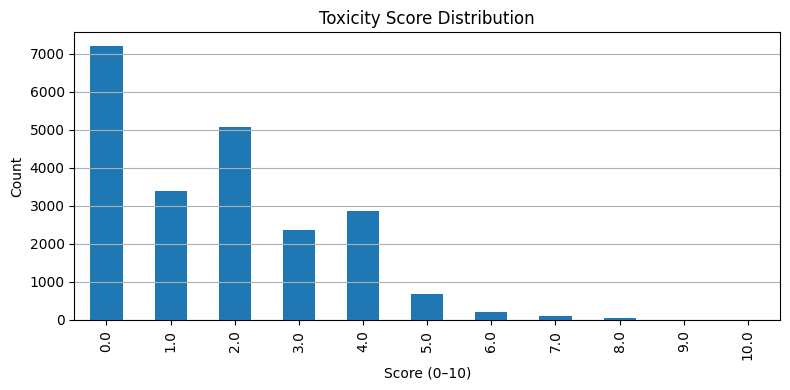

In [17]:
# Ensure clean numeric score
df_cleaned["note_numeric"] = df_cleaned["note"].str.extract(r"(\d+)/10").astype(float)

plt.figure(figsize=(8, 4))
df_cleaned["note_numeric"].value_counts().sort_index().plot(kind="bar")
plt.title("Toxicity Score Distribution")
plt.xlabel("Score (0–10)")
plt.ylabel("Count")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

### Average Toxicity by Category (flattened)

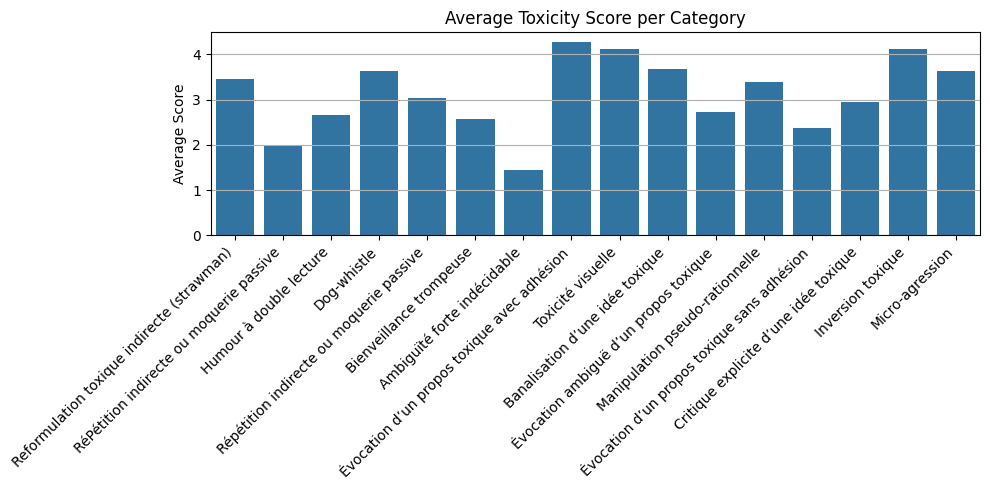

In [18]:
flat_cats = [cat for lst in df_cleaned["categorie_list"] if isinstance(lst, list) for cat in lst]
cat_scores = {cat: [] for cat in set(flat_cats)}

for _, row in df_cleaned.iterrows():
    if isinstance(row["categorie_list"], list):
        for cat in row["categorie_list"]:
            cat_scores[cat].append(row["note_numeric"])

avg_cat_scores = {cat: sum(scores)/len(scores) for cat, scores in cat_scores.items()}
plt.figure(figsize=(10, 5))
sns.barplot(x=list(avg_cat_scores.keys()), y=list(avg_cat_scores.values()))
plt.title("Average Toxicity Score per Category")
plt.ylabel("Average Score")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

### Label Code Frequencies

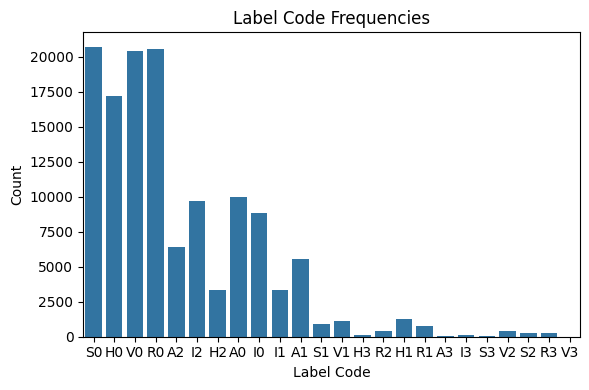

In [19]:
flat_labels = [label for sublist in df_cleaned["labels_list"] if isinstance(sublist, list) for label in sublist]
label_counts = Counter(flat_labels)
plt.figure(figsize=(6, 4))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.title("Label Code Frequencies")
plt.ylabel("Count")
plt.xlabel("Label Code")
plt.tight_layout()
plt.show()

### Top Category Combinations

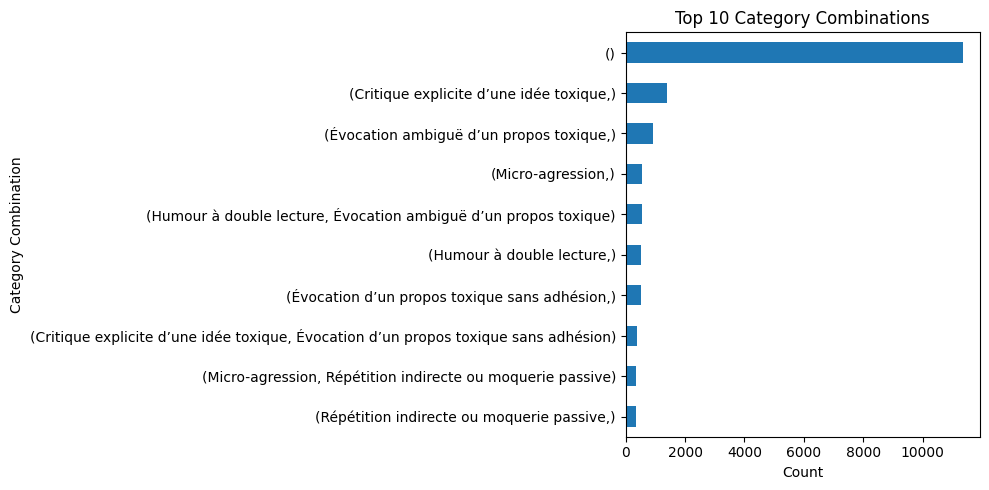

In [20]:
combo_counts = df_cleaned["categorie_list"].apply(lambda x: tuple(sorted(x)) if isinstance(x, list) else ()).value_counts().head(10)
plt.figure(figsize=(10, 5))
combo_counts.plot(kind="barh")
plt.title("Top 10 Category Combinations")
plt.xlabel("Count")
plt.ylabel("Category Combination")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Certitude

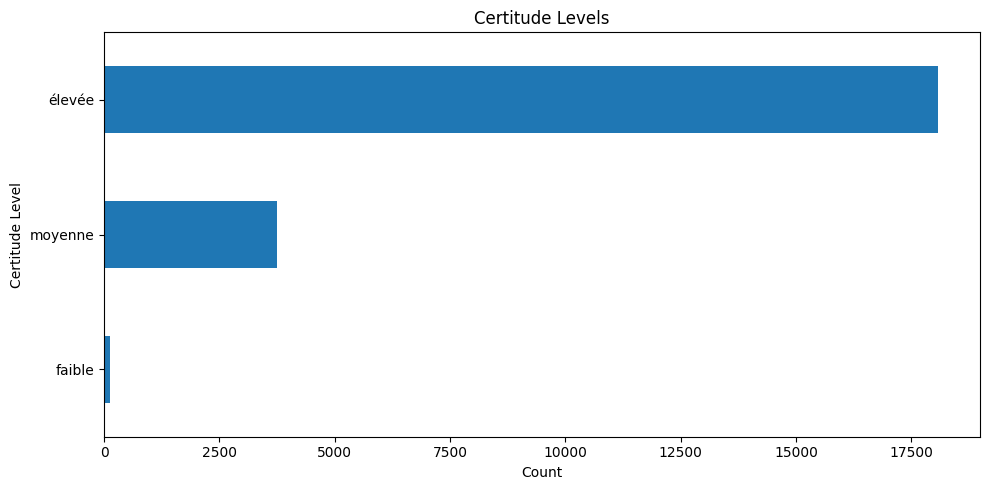

In [21]:
certitude_counts = df_cleaned["certitude"].value_counts()
plt.figure(figsize=(10, 5))
certitude_counts.plot(kind="barh")
plt.title("Certitude Levels")
plt.xlabel("Count")
plt.ylabel("Certitude Level")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

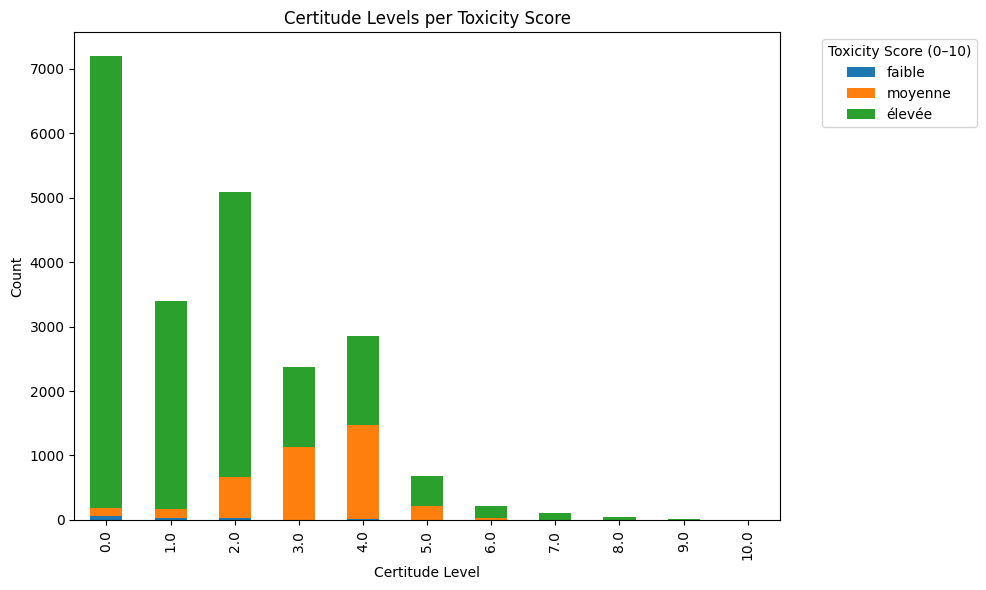

In [22]:
# Plot certitude levels per toxicity score
plt.figure(figsize=(10, 6))
certitude_toxicity = df_cleaned.groupby(["note_numeric", "certitude"]).size().unstack(fill_value=0)
certitude_toxicity.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Certitude Levels per Toxicity Score")
plt.xlabel("Certitude Level")
plt.ylabel("Count")
plt.legend(title="Toxicity Score (0–10)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()